# 使用OSMnx构建场所边界和街道网络，并保存为各种文件格式以供以后使用

In [1]:
import osmnx as ox
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11dev'

In [2]:
place = 'Beijing, CN'

## 从OSM获取该地点的几何形状，并保存成shp文件

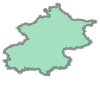

In [3]:
gdf = ox.gdf_from_place(place,which_result =2)
gdf.loc[0, 'geometry']

In [4]:
# 保存地理边界到shp文件
ox.save_gdf_shapefile(gdf, filename='Beijing-shape')

# 保存网络到文件中

## 构造街道网络并另存为shapefile以在GIS中使用

In [5]:
# 根据城市规模，和电脑网速调整time_out 和是否采用buffer_dist
G = ox.graph_from_place(place, network_type='drive',which_result=2,buffer_dist=500,timeout=300,simplify=False, retain_all=True)
G_projected = ox.project_graph(G)

In [6]:
# 保存道机动车路网到shp文件
ox.save_graph_shapefile(G_projected, filename='beijing-network-shape')

## 将街道网络另存为GraphML以在Gephi或NetworkX中使用

In [7]:
# 保存路网到 GraphML 文件
ox.save_graphml(G_projected, filename='beijing_network.graphml')

## 将街道网络另存为SVG以在lllustrator中使用

In [8]:
# 保存路网到SVG文件
fig, ax = ox.plot_graph(G_projected, show=False, save=True, 
                           filename='beijing_drive_network', file_format='svg')

# 从文件中加载路网

从 GraphML 文件中加载路网

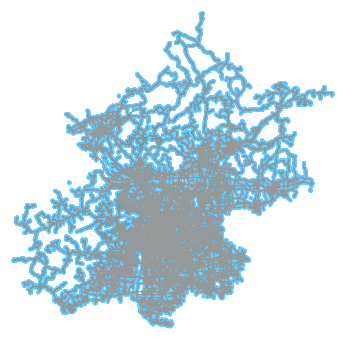

In [9]:
G2 = ox.load_graphml('beijing_network.graphml')
fig, ax = ox.plot_graph(G2)

# 将建筑轮廓图保存到shp


In [10]:
gdf = ox.footprints_from_place(place="National exhibition and convention center,CN")
gdf.to_file('data/National exhibition and convention center')